In [35]:
!nvidia-smi
!cat /proc/cpuinfo | grep "model name"

/bin/bash: line 1: nvidia-smi: command not found
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

taxi_df = pd.read_csv('/content/drive/MyDrive/dataset_classification.csv')
print(taxi_df.info())
print(taxi_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413365 entries, 0 to 5413364
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   passenger_count        float64
 1   trip_distance          float64
 2   PULocationID           int64  
 3   DOLocationID           int64  
 4   fare_amount            float64
 5   extra                  float64
 6   mta_tax                float64
 7   tolls_amount           float64
 8   improvement_surcharge  float64
 9   total_amount           float64
 10  congestion_surcharge   float64
 11  trip_duration          float64
 12  fare_per_mile          float64
 13  RatecodeID_1.0         bool   
 14  RatecodeID_2.0         bool   
 15  RatecodeID_3.0         bool   
 16  RatecodeID_4.0         bool   
 17  RatecodeID_5.0         bool   
 18  RatecodeID_6.0         bool   
 19  RatecodeID_99.0        bool   
 20  VendorID_1.0           bool   
 21  VendorID_2.0           bool   
 22  day_of_week_Friday

In [38]:
# Seleziona solo le colonne 'total_amount' e 'trip_duration'
x = taxi_df[['total_amount', 'trip_duration']]

# Visualizza le prime righe del nuovo DataFrame
print(x.head())

   total_amount  trip_duration
0      0.350544       0.148859
1      0.382582       0.230290
2      0.335925       0.191909
3      0.253810       0.150415
4      0.149300       0.071058


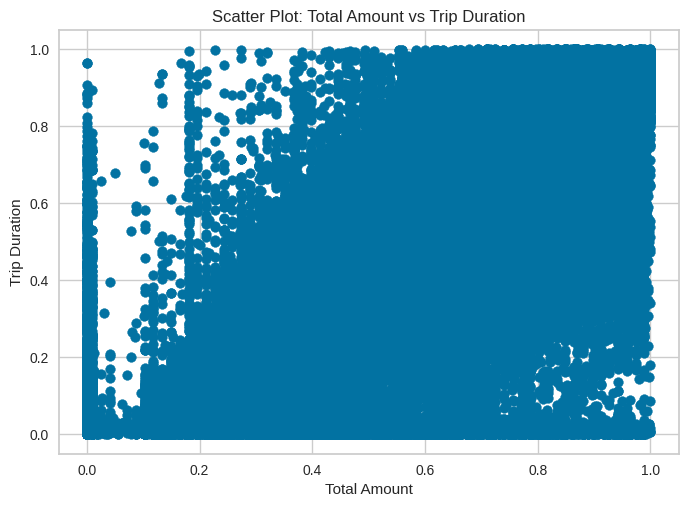

In [39]:
plt.scatter(x['total_amount'], x['trip_duration'])
plt.xlabel('Total Amount')
plt.ylabel('Trip Duration')
plt.title('Scatter Plot: Total Amount vs Trip Duration')
plt.show()

In [40]:
# Campiona 10.000 righe casuali dal DataFrame x
x_sample = x.sample(n=10000, random_state=42)

# Visualizza le prime righe del campione
print(x_sample.head())

         total_amount  trip_duration
4135128      0.346812       0.134336
5224588      0.429238       0.236515
1025742      0.403110       0.234959
5260056      0.460342       0.431017
4670806      0.491446       0.450726


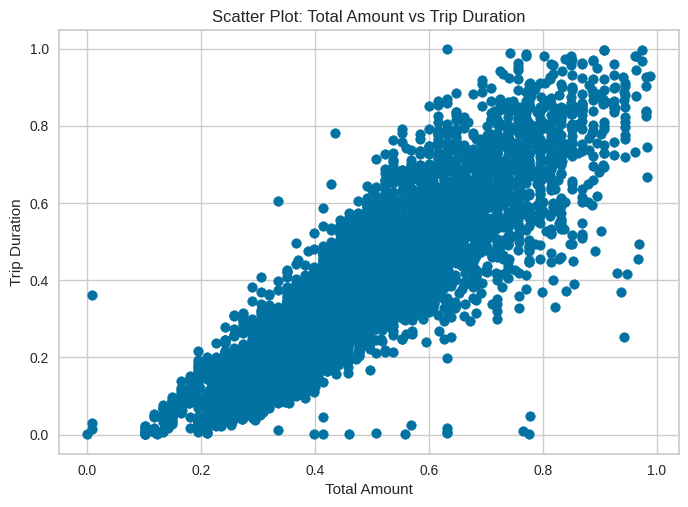

In [41]:
plt.scatter(x_sample['total_amount'], x_sample['trip_duration'])
plt.xlabel('Total Amount')
plt.ylabel('Trip Duration')
plt.title('Scatter Plot: Total Amount vs Trip Duration')
plt.show()

Text(0, 0.5, 'wcss')

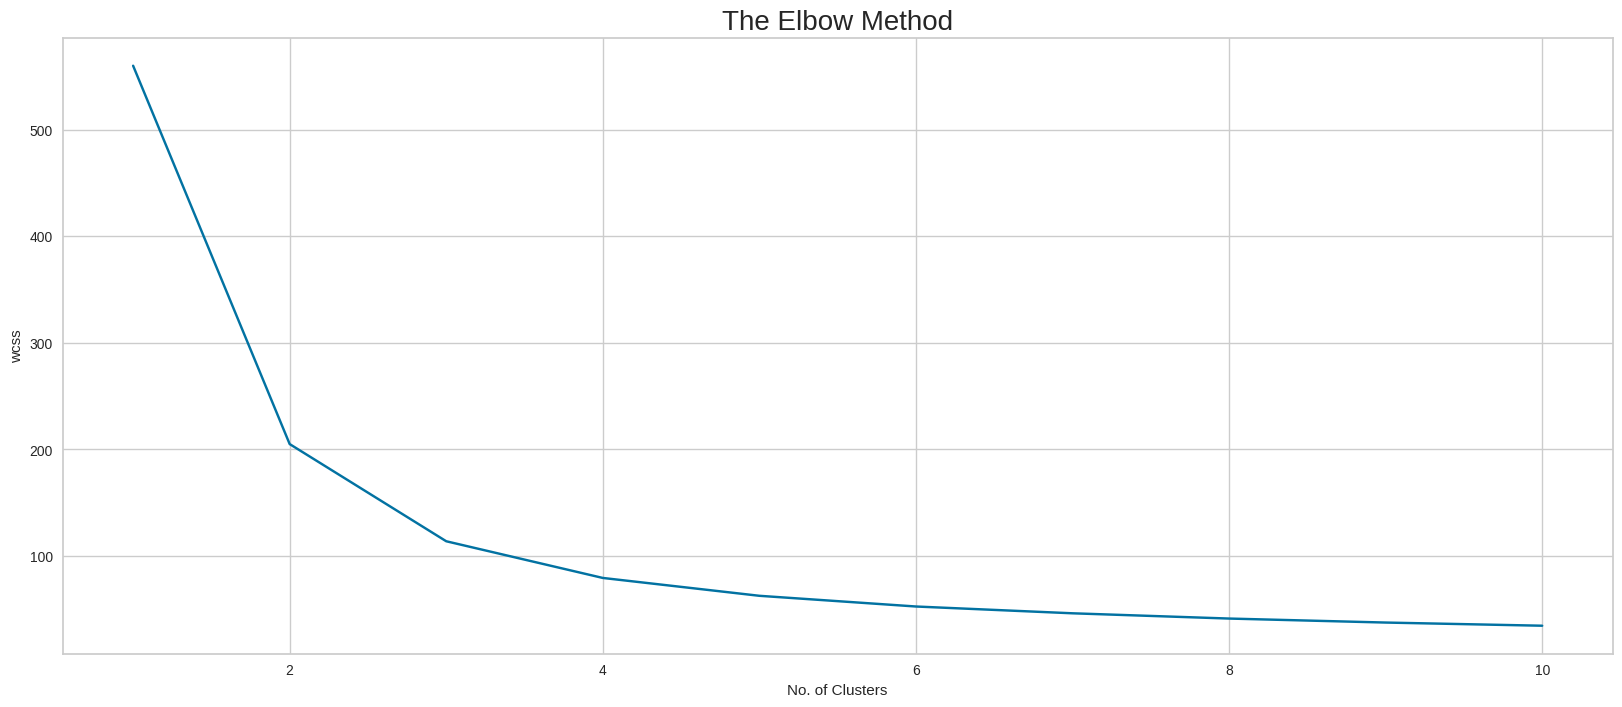

In [42]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_sample)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

In [43]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x_sample)

In [44]:
y_means

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)

In [45]:
print('x',x_sample.shape)
print('y_means', len(y_means))

x (10000, 2)
y_means 10000


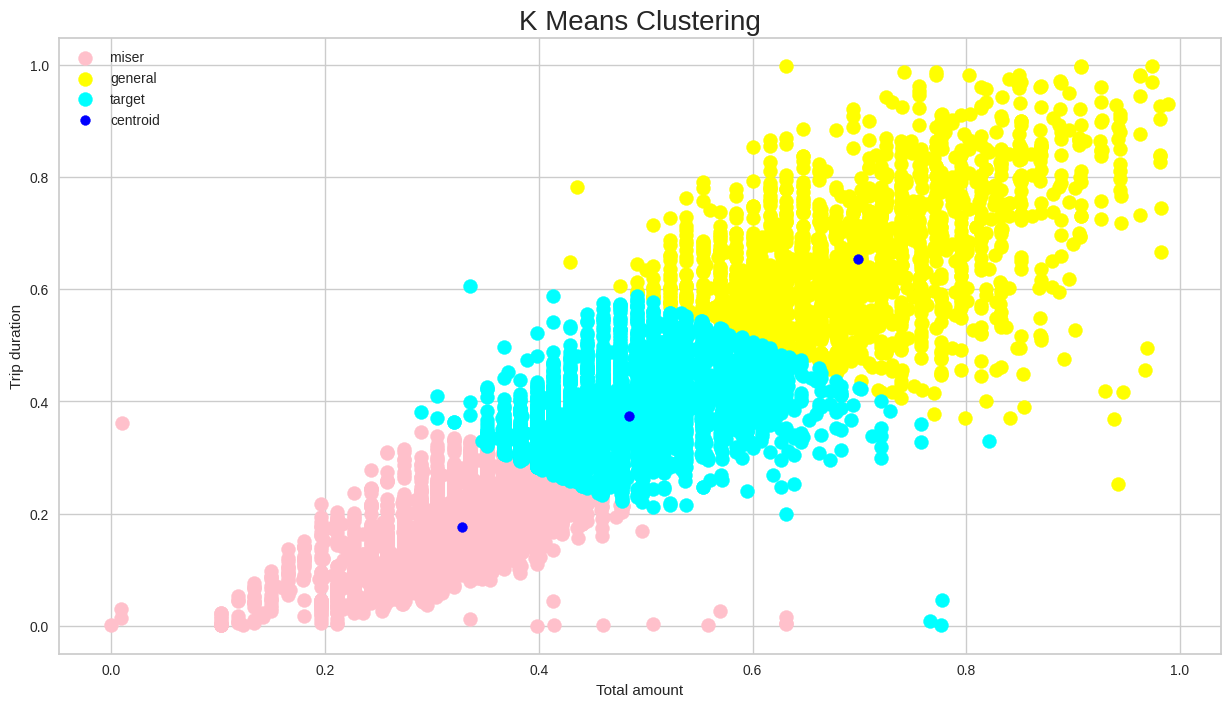

In [46]:
plt.figure(figsize=(15,8))
plt.scatter(x_sample.iloc[y_means == 0, 0], x_sample.iloc[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x_sample.iloc[y_means == 1, 0], x_sample.iloc[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x_sample.iloc[y_means == 2, 0], x_sample.iloc[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
#plt.scatter(x.iloc[y_means == 3, 0], x.iloc[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
#plt.scatter(x.iloc[y_means == 4, 0], x.iloc[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Total amount')
plt.ylabel('Trip duration')
plt.legend()
plt.show()

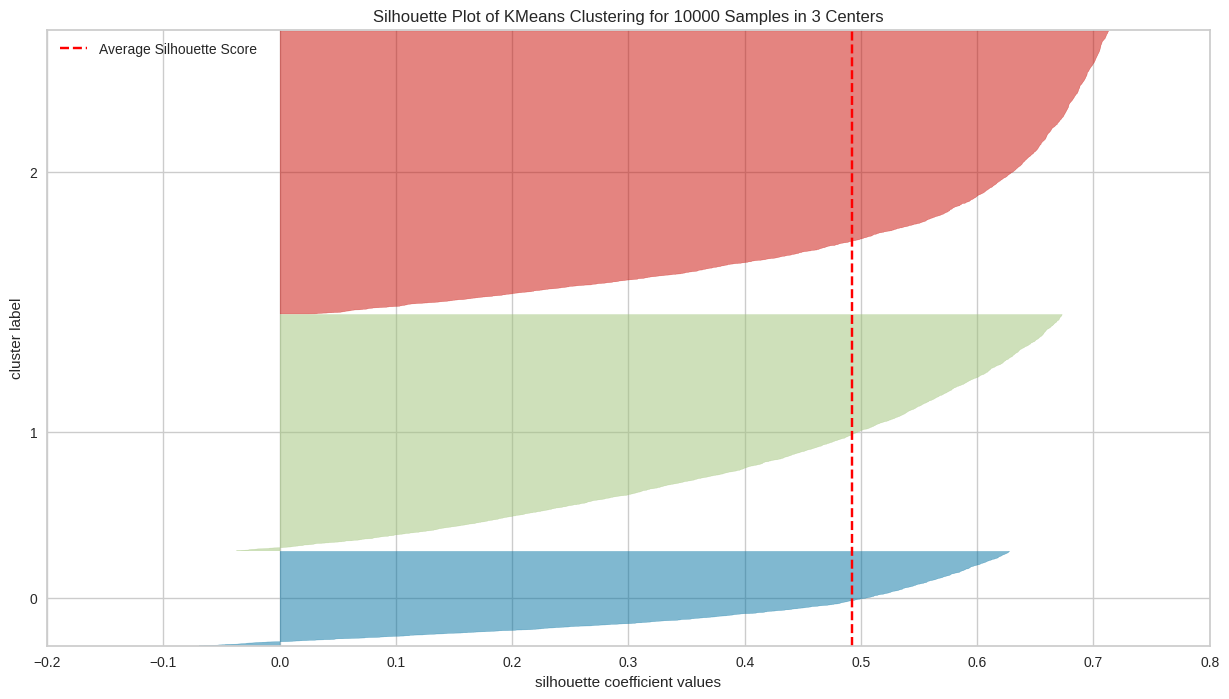

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x_sample)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

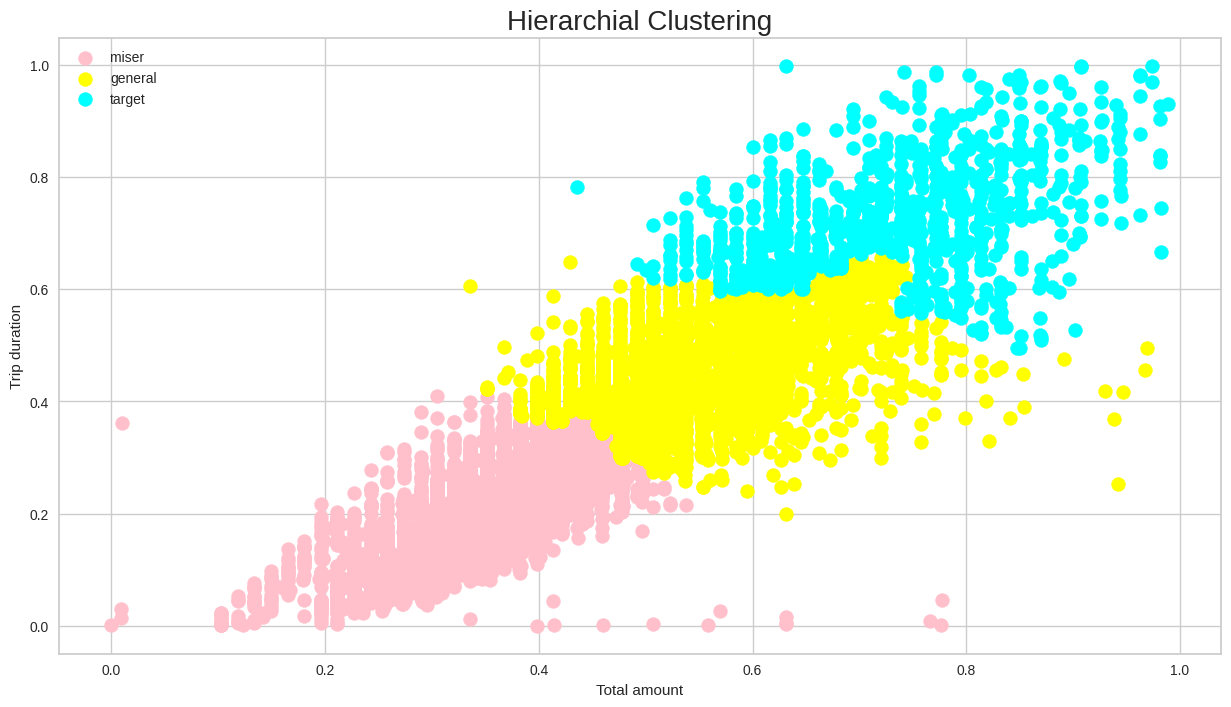

In [48]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_hc = hc.fit_predict(x_sample)

plt.figure(figsize=(15,8))
plt.scatter(x_sample.iloc[y_hc == 0, 0], x_sample.iloc[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x_sample.iloc[y_hc == 1, 0], x_sample.iloc[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x_sample.iloc[y_hc == 2, 0], x_sample.iloc[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
#plt.scatter(x_sample[y_hc == 3, 0], x_sample[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
#plt.scatter(x_sample[y_hc == 4, 0], x_sample[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Total amount')
plt.ylabel('Trip duration')
plt.legend()
plt.show()

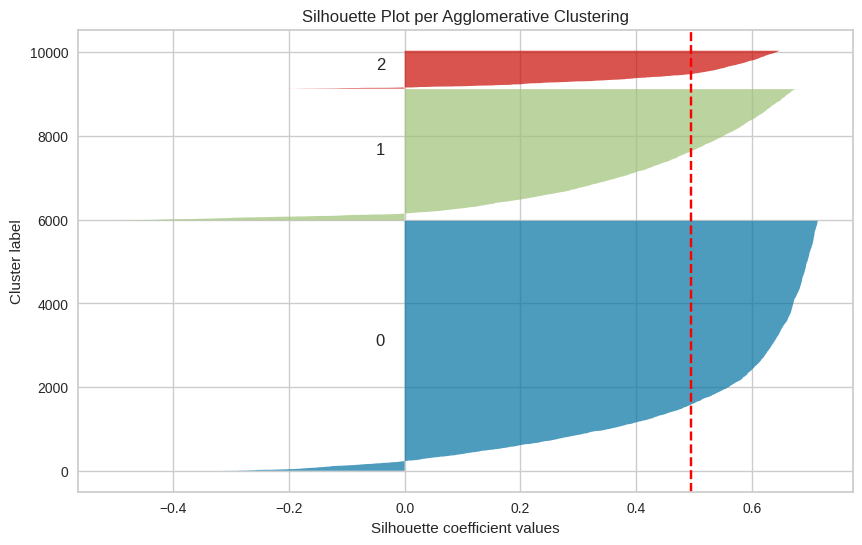

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# Creazione del modello di clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Calcolare le etichette dei cluster
y_hc = hc.fit_predict(x_sample)

# Calcolare il silhouette score per ogni punto
silhouette_vals = silhouette_samples(x_sample, y_hc)
silhouette_avg = silhouette_score(x_sample, y_hc)

# Creare il grafico della silhouette
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(3):  # Iteriamo sui cluster
    cluster_silhouette_vals = silhouette_vals[y_hc == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, cluster_silhouette_vals,
        alpha=0.7
    )

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spazio tra cluster

ax.axvline(x=silhouette_avg, color="red", linestyle="--")  # Linea media silhouette
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.set_title("Silhouette Plot per Agglomerative Clustering")
plt.show()


'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', , 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday','fare_per_mile',

In [50]:
# Campiona 10.000 righe casuali dal DataFrame x
taxi_df_sample = taxi_df.sample(n=10000, random_state=42)

# Visualizza le prime righe del campione
print(taxi_df_sample.head())

taxi_df_sample = taxi_df_sample[['passenger_count', 'trip_distance',
       'total_amount', 'congestion_surcharge',
       'trip_duration',
       'tipped']]

         passenger_count  trip_distance  PULocationID  DOLocationID  \
4135128              0.0       0.189329           186           163   
5224588              0.0       0.345955           234           161   
1025742              0.0       0.192771           230           163   
5260056              0.0       0.344234           231           234   
4670806              0.5       0.371773           161            68   

         fare_amount     extra   mta_tax  tolls_amount  improvement_surcharge  \
4135128     0.172902  0.222222  0.151515           0.0                    1.0   
5224588     0.251493  0.037037  0.151515           0.0                    1.0   
1025742     0.220057  0.037037  0.151515           0.0                    1.0   
5260056     0.330085  0.185185  0.151515           0.0                    1.0   
4670806     0.361522  0.000000  0.151515           0.0                    1.0   

         total_amount  ...  VendorID_1.0  VendorID_2.0  day_of_week_Friday  \
4135128 

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(taxi_df_sample)
pca_x = pca.transform(taxi_df_sample)

Text(0, 0.5, 'wcss')

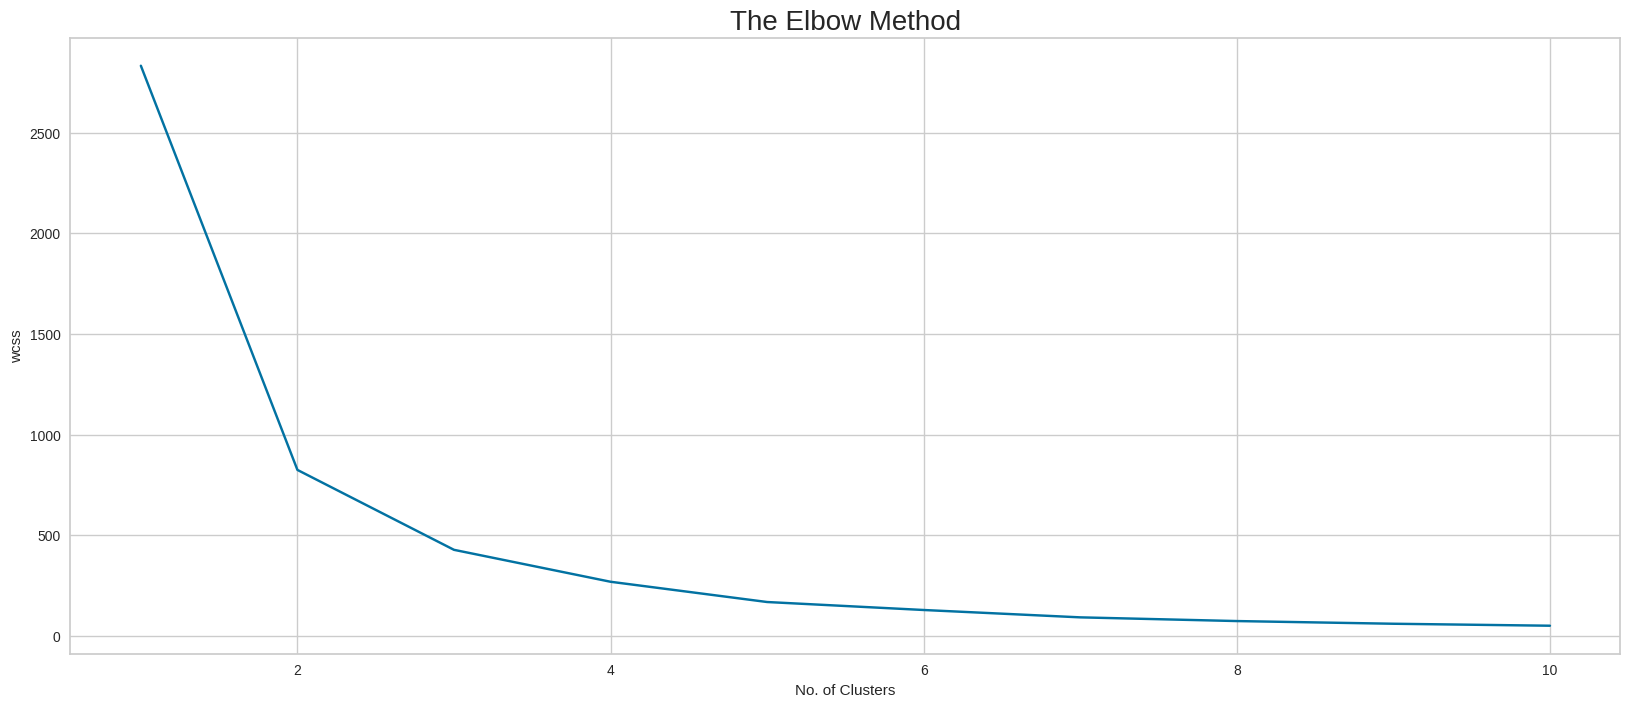

In [52]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(pca_x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

<ipython-input-53-22cd74841536>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


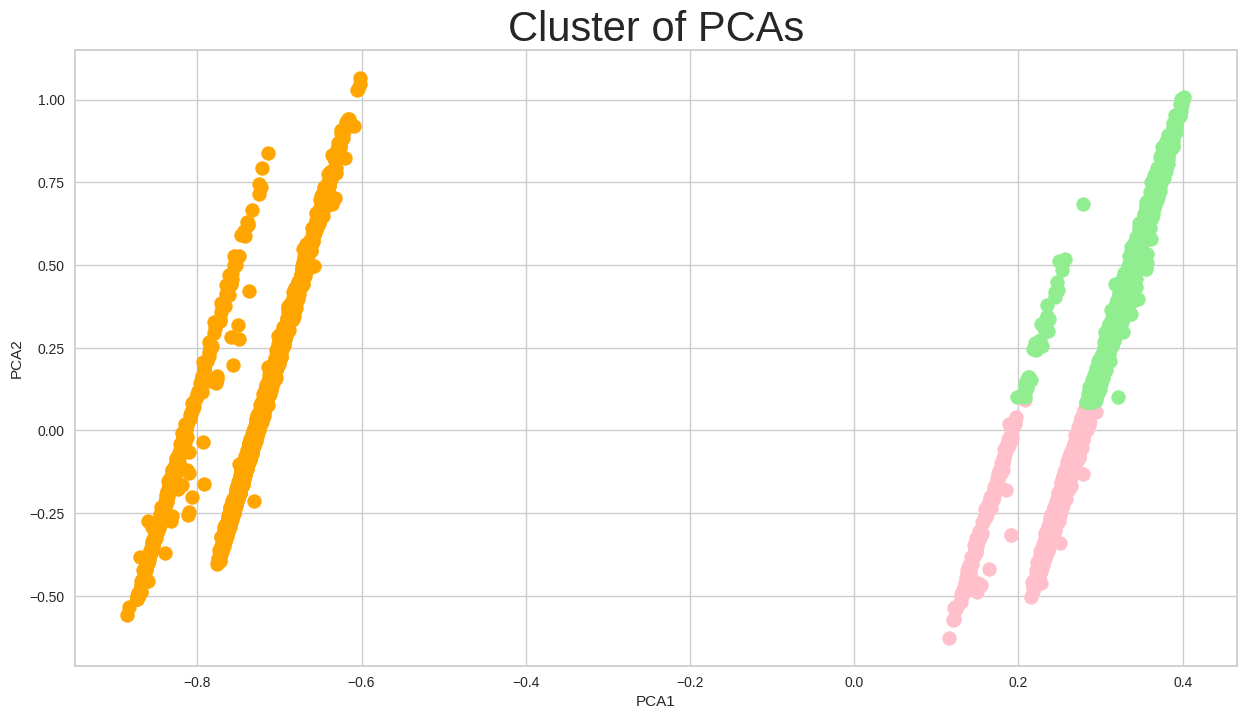

In [53]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(pca_x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
#plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
#plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
#plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

#centers = pca.transform(kmeans.cluster_centers_)
#plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

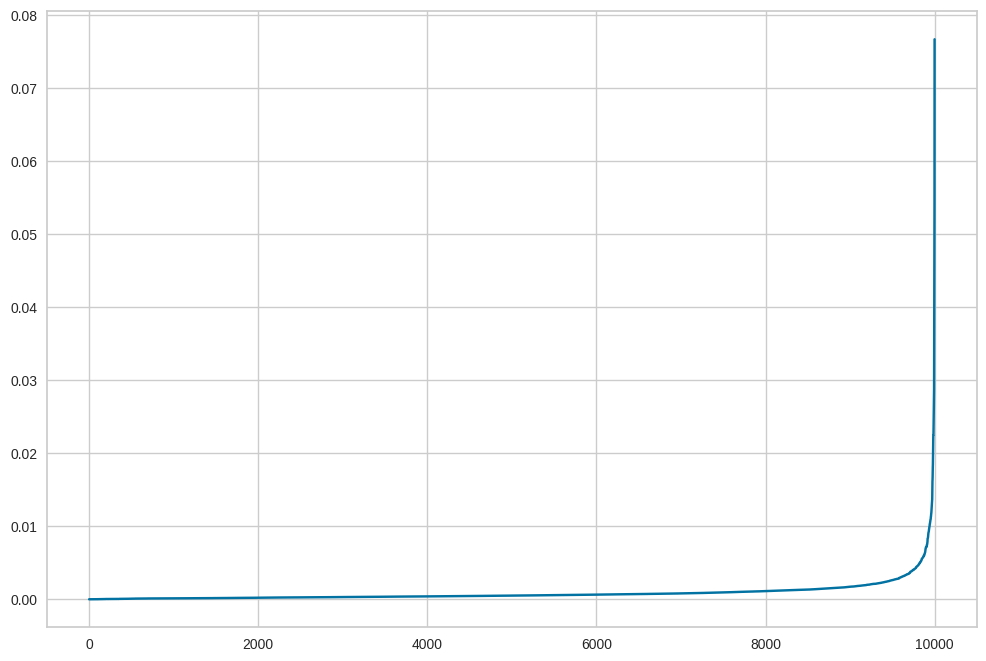

In [83]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(pca_x)
distances, indices = nbrs.kneighbors(pca_x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [106]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=3).fit(pca_x)
ymeans = db.labels_
print(ymeans)

[0 0 0 ... 0 1 0]


In [107]:
# Contare il numero di occorrenze di ciascun cluster
unique_labels, counts = np.unique(ymeans, return_counts=True)

# Stampare il conteggio dei punti per ciascun cluster
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} punti")

Cluster 0: 7285 punti
Cluster 1: 2715 punti


<ipython-input-80-1925b50558ee>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


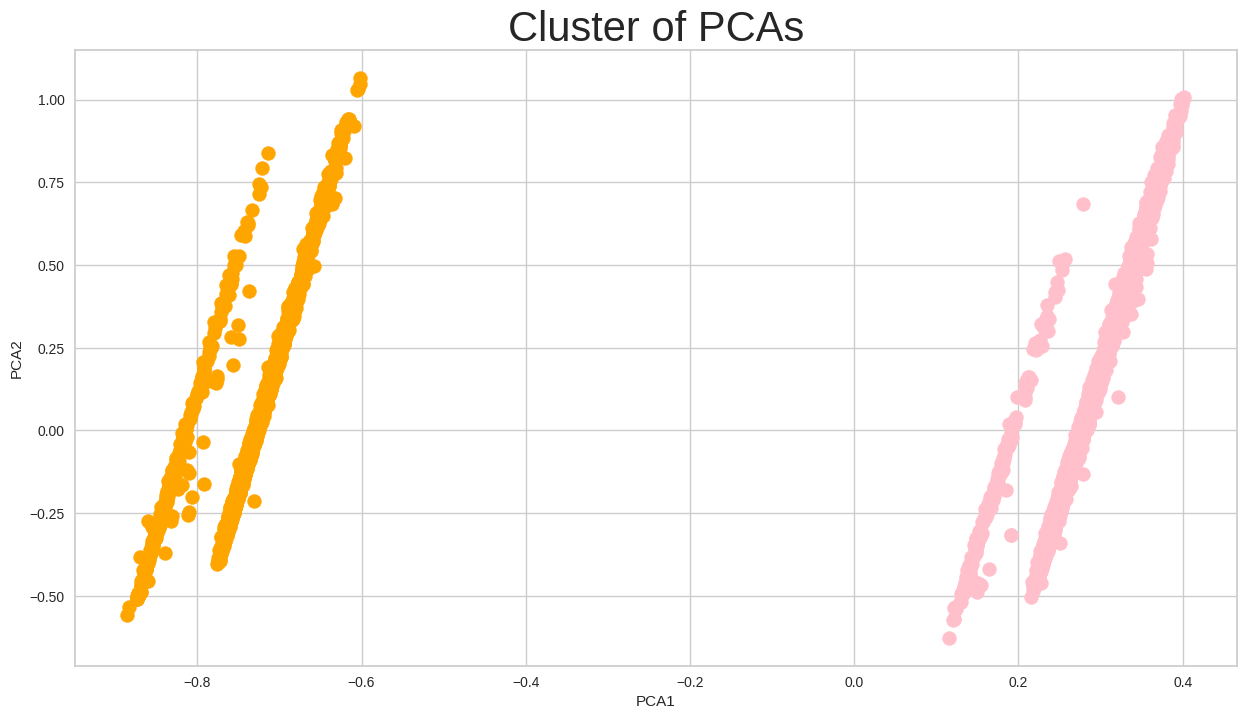

In [80]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

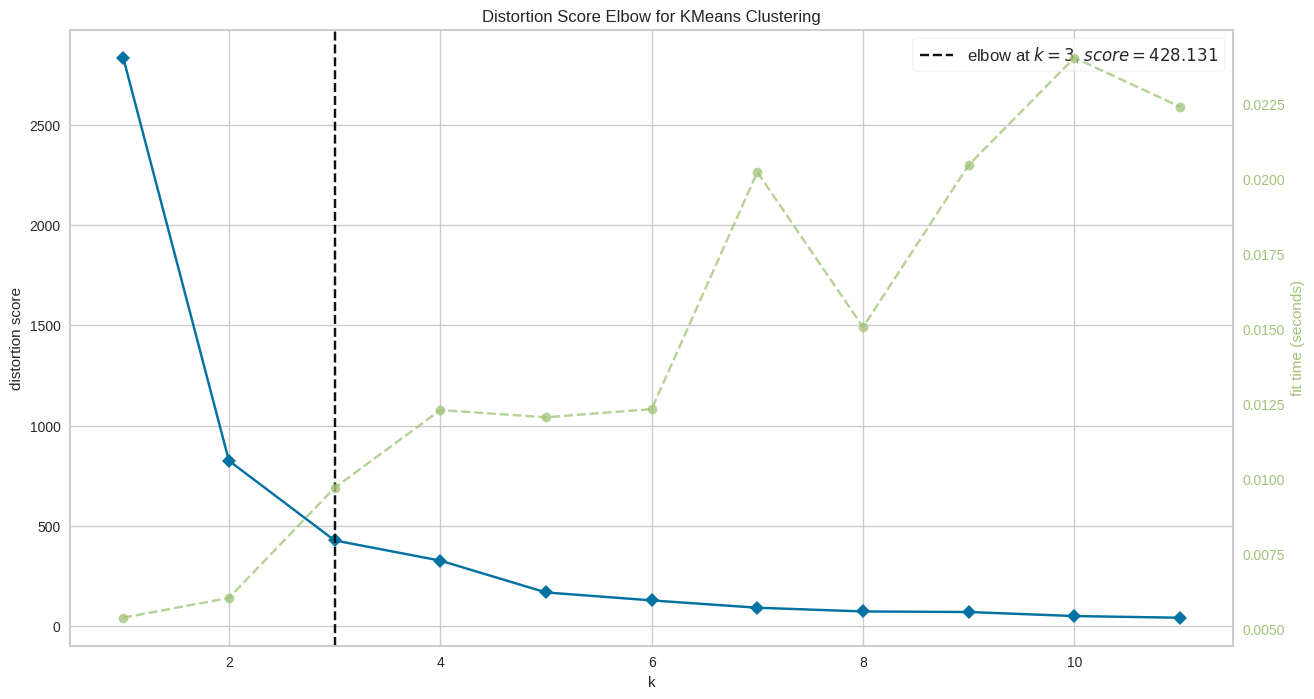

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(pca_x)        # Fit the data to the visualizer
visualizer.show()

In [61]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(pca_x)

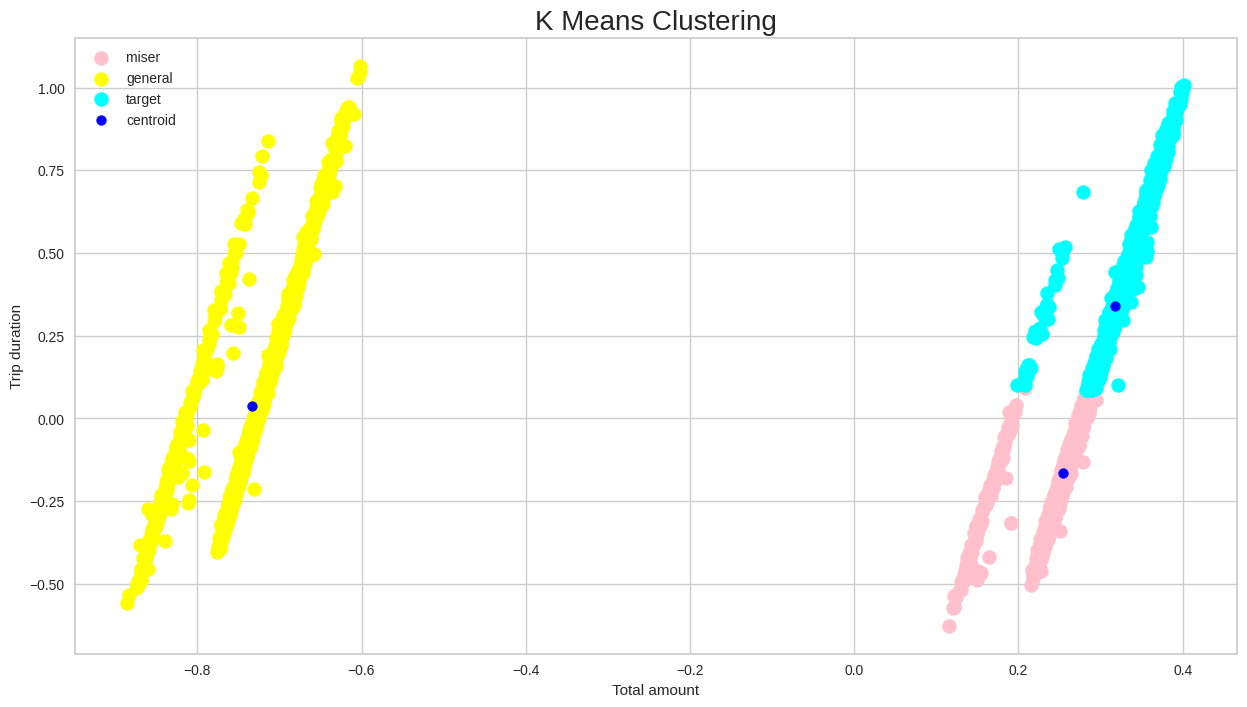

In [62]:
plt.figure(figsize=(15,8))
plt.scatter(pca_x[y_means == 0, 0], pca_x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(pca_x[y_means == 1, 0], pca_x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(pca_x[y_means == 2, 0], pca_x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
#plt.scatter(x.iloc[y_means == 3, 0], x.iloc[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
#plt.scatter(x.iloc[y_means == 4, 0], x.iloc[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Total amount')
plt.ylabel('Trip duration')
plt.legend()
plt.show()

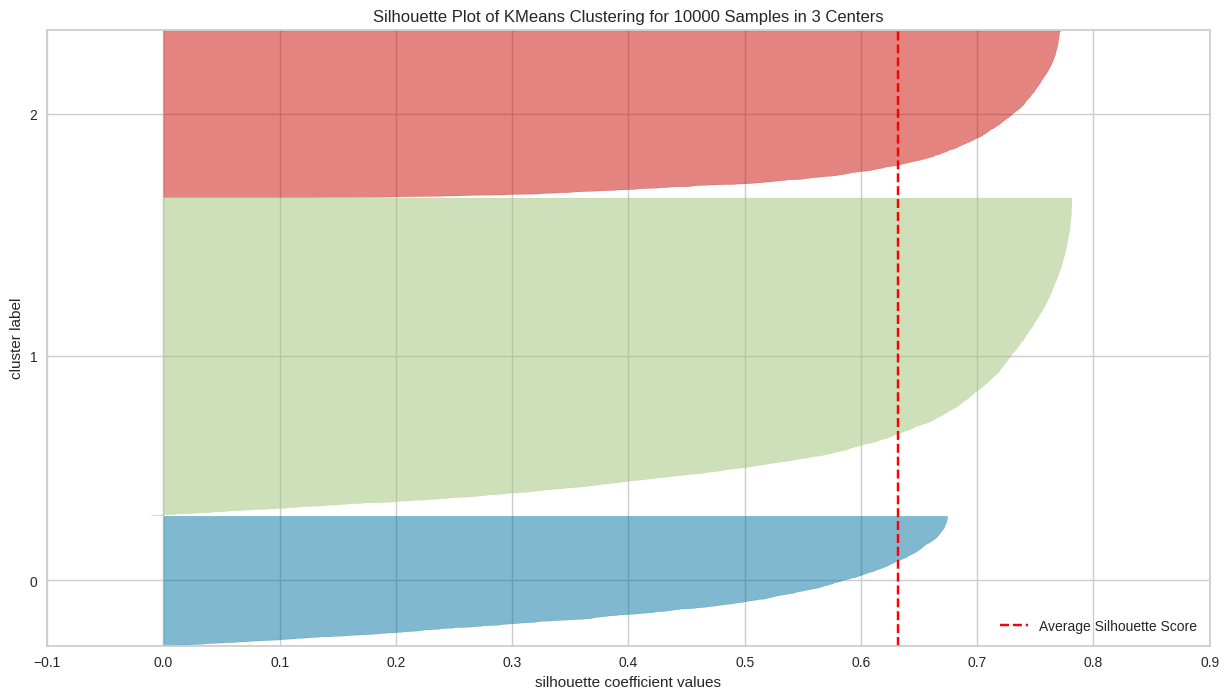

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(pca_x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [64]:
# Aggiungi le etichette dei cluster al DataFrame
x_sample['cluster'] = y_means  # Per KMeans
# Oppure, se stai usando AgglomerativeClustering:
# x_sample['cluster'] = y_hc

In [65]:
# Raggruppa il DataFrame per cluster e calcola le statistiche descrittive
cluster_stats = x_sample.groupby('cluster').describe()

# Visualizza le statistiche
print(cluster_stats)

        total_amount                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0             5107.0  0.394468  0.073409  0.123173  0.341213  0.398134   
1             2715.0  0.378287  0.134392  0.000000  0.273717  0.351477   
2             2178.0  0.649067  0.110872  0.414308  0.556532  0.626750   

                            trip_duration                                \
              75%       max         count      mean       std       min   
cluster                                                                   
0        0.446190  0.776361        5107.0  0.240927  0.098704  0.001037   
1        0.444790  0.899533        2715.0  0.311050  0.191126  0.000519   
2        0.720373  0.989114        2178.0  0.546181  0.149658  0.229772   

                                                 
              25%       50%       75%       max  
clus

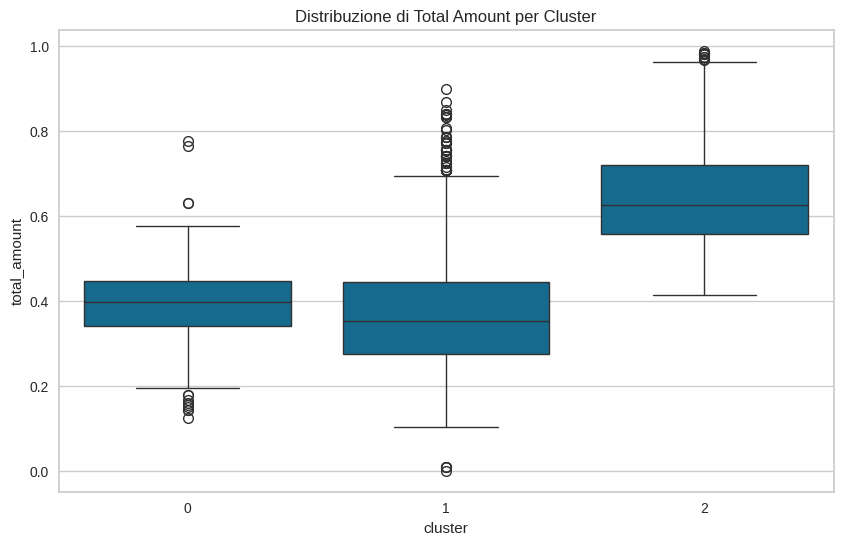

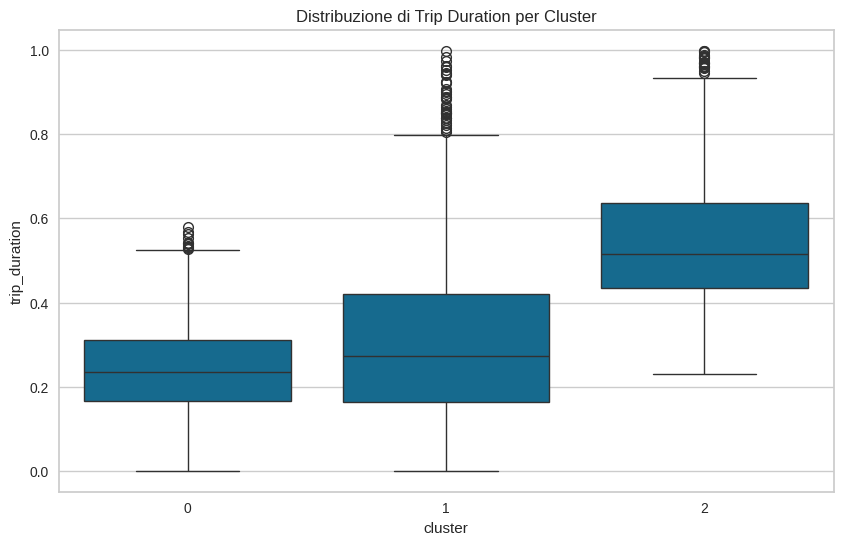

In [66]:
import seaborn as sns

# Boxplot per confrontare 'total_amount' tra i cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='total_amount', data=x_sample)
plt.title('Distribuzione di Total Amount per Cluster')
plt.show()

# Boxplot per confrontare 'trip_duration' tra i cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='trip_duration', data=x_sample)
plt.title('Distribuzione di Trip Duration per Cluster')
plt.show()

In [67]:
from scipy.stats import f_oneway

# Esegui un'ANOVA per ogni variabile
for column in x_sample.columns[:-1]:  # Escludi la colonna 'cluster'
    groups = [x_sample[column][x_sample['cluster'] == i] for i in range(3)]  # 3 cluster
    f_stat, p_value = f_oneway(*groups)
    print(f"Variabile: {column}, F-statistic: {f_stat}, p-value: {p_value}")

Variabile: total_amount, F-statistic: 5604.606425393725, p-value: 0.0
Variabile: trip_duration, F-statistic: 3620.429314218048, p-value: 0.0


In [68]:
# Calcola la media delle variabili per ciascun cluster
cluster_profiles = x_sample.groupby('cluster').mean()

# Visualizza i profili dei cluster
print(cluster_profiles)

         total_amount  trip_duration
cluster                             
0            0.394468       0.240927
1            0.378287       0.311050
2            0.649067       0.546181


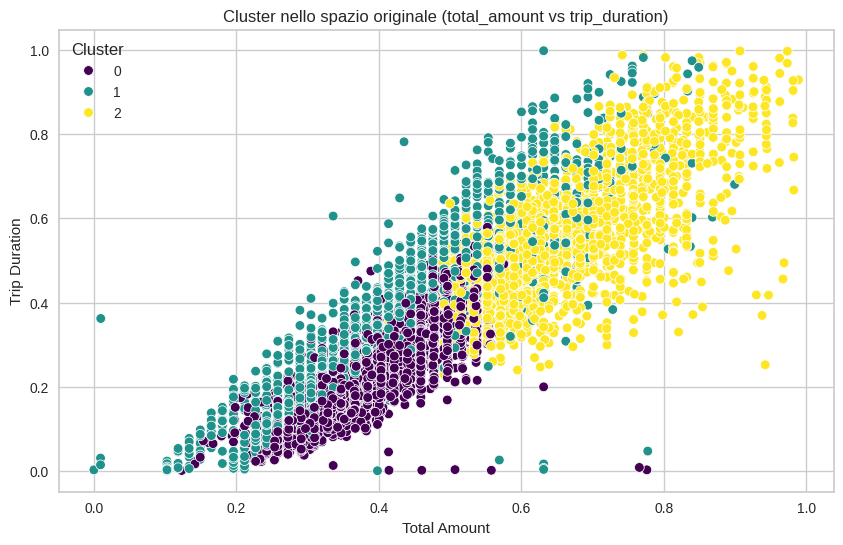

In [69]:
# Aggiungi le etichette dei cluster a x_sample
x_sample['cluster'] = y_means  # Usa y_means per KMeans o y_hc per AgglomerativeClustering

# Visualizza i cluster nello spazio originale
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_amount', y='trip_duration', hue='cluster', data=x_sample, palette='viridis')
plt.title('Cluster nello spazio originale (total_amount vs trip_duration)')
plt.xlabel('Total Amount')
plt.ylabel('Trip Duration')
plt.legend(title='Cluster')
plt.show()

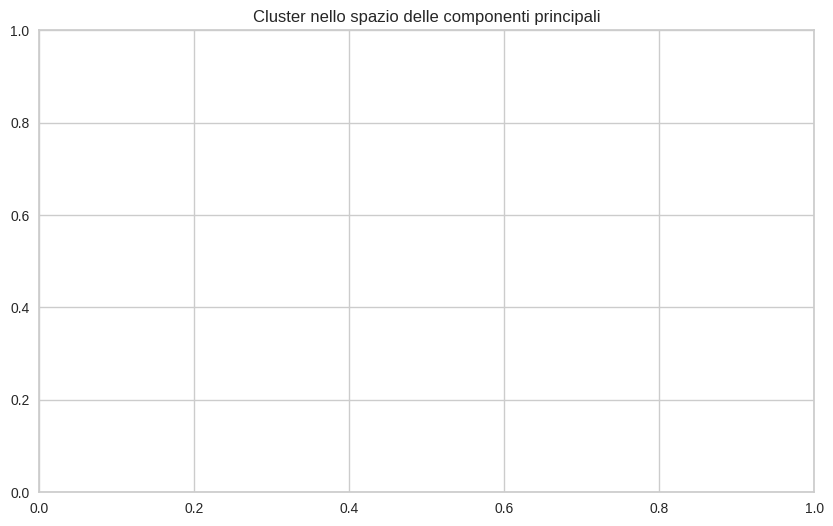

In [70]:
# Aggiungi le etichette dei cluster al DataFrame delle componenti principali
pca_df = pd.DataFrame(x_sample, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = ymeans  # Usa le etichette dei cluster appropriate

# Visualizza i cluster nello spazio delle componenti principali
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Cluster nello spazio delle componenti principali')
plt.show()